# Notes
### variable: eta_t
    default fill value: -32,768
#### time_ytocean_arr[0] contains missing values
    


In [1]:
import netCDF4 as nc4
import keras
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils


In [3]:
file_path =['C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_01.nc']
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_02.nc')
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_03.nc')
file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_04.nc')
# file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_05.nc')
# file_path.append('C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_06.nc')

In [4]:
file_path

['C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_01.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_02.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_03.nc',
 'C:/Users/Administrator/OneDrive - The University of Melbourne/capstone/data/OFAM_2017/ocean_eta_t/ocean_eta_t_2000_04.nc']

In [81]:
ds.variables['eta_t']

<class 'netCDF4._netCDF4._Variable'>
int16 eta_t('Time', 'yt_ocean', 'xt_ocean')
    long_name: surface height on T cells [Boussinesq (volume conserving) model]
    units: meter
    valid_range: [-32767  32767]
    missing_value: -32768
    _FillValue: -32768
    packing: 4
    scale_factor: 0.03051851
    add_offset: 0.0
    cell_methods: time: mean
    time_avg_info: average_T1,average_T2,average_DT
    coordinates: geolon_t geolat_t
unlimited dimensions = ('Time',)
current size = (121, 1500, 3600)

In [6]:
ds = nc4.MFDataset(file_path)
eta_t_arr = ds.variables['eta_t'][:]

In [7]:
eta_t_arr.shape

(121, 1500, 3600)

In [8]:
time_ytocean_arr = eta_t_arr[:,:,1]
time_ytocean_arr.shape

(121, 1500)

In [92]:
time_ytocean_arr[0]

masked_array(data=[--, --, --, ..., -0.8239997625350952,
                   -0.7934812307357788, -0.7629627585411072],
             mask=[ True,  True,  True, ..., False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [70]:
f = open('text.txt', 'w')
for item in time_ytocean_arr:
    f.write(','.join([str(j) for j in item]) + '\n')
    # print(item)

In [90]:
# split into train & test
time_ytocean_train, time_ytocean_test = train_test_split(time_ytocean_arr.data, test_size=0.33)
time_ytocean_train.shape

(81, 1500)

In [46]:
len(time_ytocean_train)

81

In [ ]:
for i in range(0,1500):
    if time_ytocean_train.mask[i]== True:
        time_

In [40]:

i = 0
for b in time_ytocean_train[0]:
    print(b)
    i=i+1
print(i)

--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
--
-1.5869625
-1.617481
-1.6479995
-1.678518
-1.7090366
-1.739555
-1.7700735
-1.7700735
-1.7700735
-1.8005921
-1.8005921
-1.8005921
-1.8005921
-1.8005921
-1.8005921
-1.8311106
-1.8311106
-1.8616291
-1.8616291
-1.8616291
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8616291
-1.8616291
-1.8616291
-1.8616291
-1.8616291
-1.8616291
-1.8616291
-1.8616291
-1.8616291
-1.8616291
-1.8616291
-1.8921475
-1.8921475
-1.8921475
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9226661
-1.9531846
-1.9531846
-1.9531846
-1.9837031
-1.9837031
-1.9837031
-2.0142217
-2.01

In [43]:
for i in time_ytocean_train.data[0]:
    print(i)

-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-32768.0
-1.5869625
-1.617481
-1.6479995
-1.678518
-1.7090366
-1.739555
-1.7700735
-1.7700735
-1.7700735
-1.8005921
-1.8005921
-1.8005921
-1.8005921
-1.8005921
-1.8005921
-1.8311106
-1.8311106
-1.8616291
-1.8616291
-1.8616291
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8921475
-1.8616291
-1.8616291
-1.8616291
-1.8616291
-1.8616291
-1.8616291


In [84]:
len(time_ytocean_train.mask[0])

1500

In [92]:
time_ytocean_train.data[0]

array([-3.2768000e+04, -3.2768000e+04, -3.2768000e+04, ...,
       -7.6296276e-01, -7.6296276e-01, -7.0192569e-01], dtype=float32)

In [93]:
len(time_ytocean_train.data[0])

1500

In [51]:
input_size = 1500
hidden_size = 1500
output_size = 1500

In [55]:
# fit a single layer autoencoder
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='tanh')(x)
r = Dense(output_size, activation='tanh')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1500)]            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_3 (Dense)              (None, 1500)              2251500   
Total params: 4,503,000
Trainable params: 4,503,000
Non-trainable params: 0
_________________________________________________________________


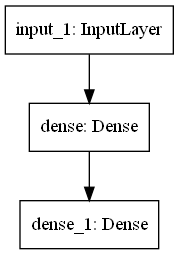

In [12]:
keras.utils.plot_model(autoencoder, "time_ytocean_autoencoder.png")

In [58]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='tanh')(x)
r = Dense(output_size, activation='tanh')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
epochs = 100
batch_size = 1500

history = autoencoder.fit(time_ytocean_train, time_ytocean_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(time_ytocean_test, time_ytocean_test))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1500)]            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1500)              2251500   
_________________________________________________________________
dense_5 (Dense)              (None, 1500)              2251500   
Total params: 4,503,000
Trainable params: 4,503,000
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 760ms/step - loss: 345029248.0000 - val_loss: 345012928.0000
Epoch 2/100
1/1 [==============================] - 0s 75ms/step - loss: 345012928.0000 - val_loss: 345008576.0000
Epoch 3/100
1/1 [==============================] - 0s 82ms/step - loss: 345008576.0000 - val_loss: 345008000.0000
Epoch 4/100
1/1 [===================

dict_keys(['loss', 'val_loss'])


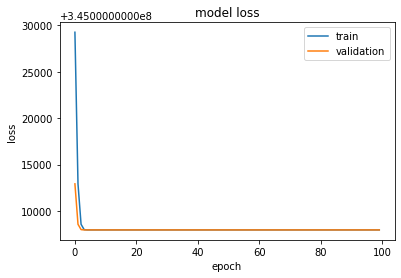

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

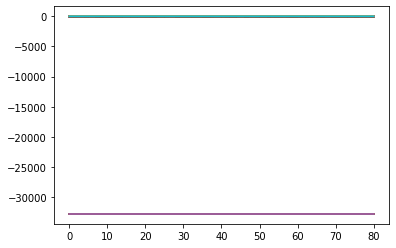

In [73]:
plt.plot(time_ytocean_train)[0]
plt.show

# Adding more layers

In [66]:
input_size = 1500
hidden_size = 150
output_size = 1500

x = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(x)
h = Dense(output_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(h)
r = Dense(output_size, activation='sigmoid')(hidden_2)

autoencoder_m = Model(inputs=x, outputs=r)
autoencoder_m.compile(optimizer='adam', loss='mse')

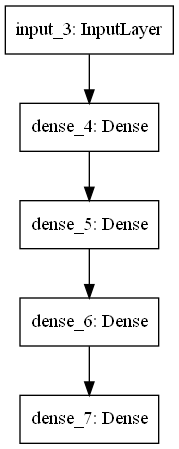

In [30]:
keras.utils.plot_model(autoencoder, "time_ytocean_multilayer_autoencoder.png")

In [67]:
epochs = 100
batch_size = 1500

history_m = autoencoder_m.fit(time_ytocean_train, time_ytocean_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(time_ytocean_test, time_ytocean_test))

Epoch 1/100
1/1 [==============================] - 1s 640ms/step - loss: 345040000.0000 - val_loss: 345039744.0000
Epoch 2/100
1/1 [==============================] - 0s 53ms/step - loss: 345039744.0000 - val_loss: 345039808.0000
Epoch 3/100
1/1 [==============================] - 0s 53ms/step - loss: 345039840.0000 - val_loss: 345039808.0000
Epoch 4/100
1/1 [==============================] - 0s 52ms/step - loss: 345039840.0000 - val_loss: 345039680.0000
Epoch 5/100
1/1 [==============================] - 0s 53ms/step - loss: 345039616.0000 - val_loss: 345039808.0000
Epoch 6/100
1/1 [==============================] - 0s 74ms/step - loss: 345039840.0000 - val_loss: 345039712.0000
Epoch 7/100
1/1 [==============================] - 0s 66ms/step - loss: 345039712.0000 - val_loss: 345039680.0000
Epoch 8/100
1/1 [==============================] - 0s 58ms/step - loss: 345039648.0000 - val_loss: 345040000.0000
Epoch 9/100
1/1 [==============================] - 0s 52ms/step - loss: 345040000.0000 

dict_keys(['loss', 'val_loss'])


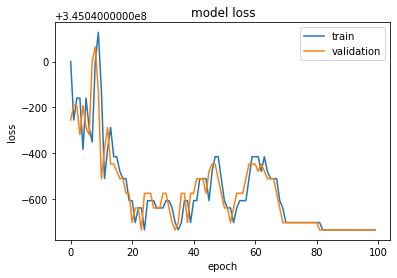

In [68]:
print(history.history.keys())

plt.plot(history_m.history['loss'])
plt.plot(history_m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()